In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['legend.fontsize'] = 25
plt.rcParams['axes.labelsize'] = 35
plt.rcParams['font.size'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

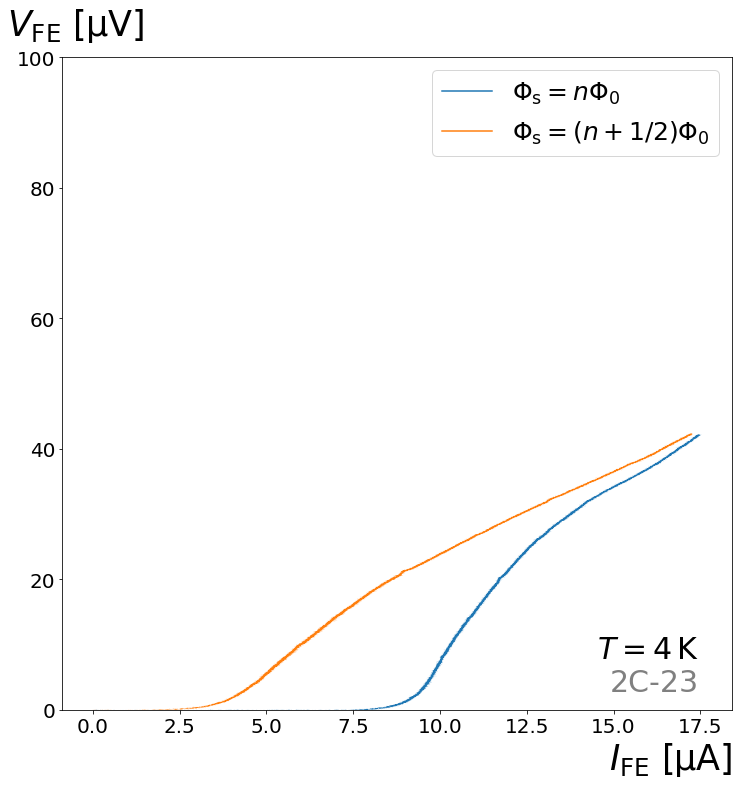

In [65]:
data_phi = np.loadtxt('FE_IV_2c23_4K/2c23_IV_Channel1Antwort_nphi_Igen124p84.csv', usecols=(3,4), delimiter = ',')
data_phi_gen = np.loadtxt('FE_IV_2c23_4K/2c23_IV_Channel2Generator_nphi_Igen124p84.csv', usecols=(3,4), delimiter = ',')

data_phi_2 = np.loadtxt('FE_IV_2c23_4K/2c23_IV_Channel1Antwort_05nphi_Igen124p84.csv', usecols=(3,4), delimiter = ',')
data_phi_2_gen = np.loadtxt('FE_IV_2c23_4K/2c23_IV_Channel2Generator_05nphi_Igen124p84.csv', usecols=(3,4), delimiter = ',')

time_phi = data_phi[:,0]
V_out_phi = data_phi[:,1]
time_phi_gen = data_phi_gen[:,0]
V_out_phi_gen = data_phi_gen[:,1]

time_phi_2 = data_phi_2[:,0]
V_out_phi_2 = data_phi_2[:,1]
time_phi_2_gen = data_phi_2_gen[:,0]
V_out_phi_2_gen = data_phi_2_gen[:,1]

#Cut and rescale raw data

cut_min, cut_max = 27500,77500

#Assumption: V_out = -V_out_meas
V_out_phi_corr = -V_out_phi[cut_min:cut_max]-min(-V_out_phi[cut_min:cut_max])
V_out_phi_2_corr = -V_out_phi_2[cut_min:cut_max]-min(-V_out_phi_2[cut_min:cut_max])

V_out_phi_gen_corr = V_out_phi_gen[cut_min:cut_max]+0.5
V_out_phi_2_gen_corr = V_out_phi_2_gen[cut_min:cut_max]+0.5

time_phi_cut = time_phi[cut_min:cut_max]-27.5*1e-3
time_phi_2_cut = time_phi_2[cut_min:cut_max]-27.5*1e-3
time_phi_gen_cut = time_phi_gen[cut_min:cut_max]-27.5*1e-3
time_phi_2_gen_cut = time_phi_gen[cut_min:cut_max]-27.5*1e-3

# Umrechnung Oszi zu I-V

R_g = 400e-3
R_fx = 10e3
Gen_amp = 124.84e-6

I_FE_phi = V_out_phi_corr/R_fx
I_FE_phi_2 = V_out_phi_2_corr/R_fx

V_FE_phi = R_g*(V_out_phi_gen_corr*Gen_amp-I_FE_phi)
V_FE_phi_2 = R_g*(V_out_phi_2_gen_corr*Gen_amp-I_FE_phi_2)

# plot

f, ax = plt.subplots()

ax.plot(I_FE_phi[0:25000]*1e6,V_FE_phi[0:25000]*1e6, linewidth=0.05, label='$\Phi_\mathrm{s} = n\Phi_0$')
ax.plot(I_FE_phi_2[0:25000]*1e6,V_FE_phi_2[0:25000]*1e6,linewidth=0.05, label='$\Phi_\mathrm{s} = (n+1/2)\Phi_0$')
leg = ax.legend()
leg.get_lines()[0].set_linewidth(1.5)
leg.get_lines()[1].set_linewidth(1.5)
ax.set_ylabel('$V_\mathrm{FE}$ [µV]', rotation=0)
ax.yaxis.set_label_coords(0.02, 1.02)
ax.set_xlabel('$I_\mathrm{FE}$ [µA]', loc='right')
ax.set_ylim(0,100)
#ax[3][0].set_title('Front-End IV-Characteristic (2C-23, T=4K)')
ax.text(0.95,0.07,'$T = 4\,\mathrm{K}$', ha='right', va='bottom', transform=ax.transAxes)
ax.text(0.95,0.02,'2C-23', ha='right', va='bottom', color = 'grey', transform=ax.transAxes)
plt.savefig('FE_resonances.pdf')

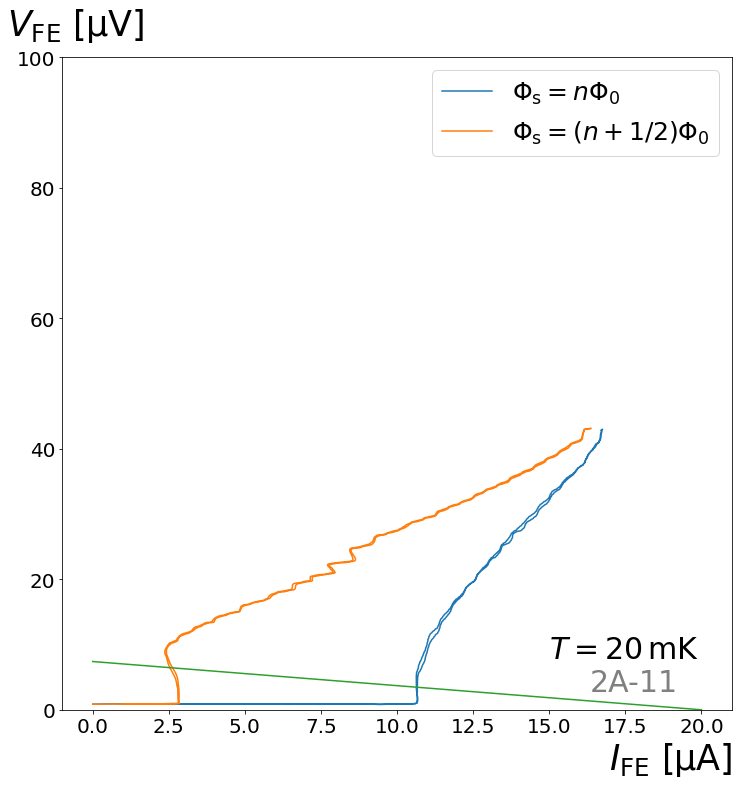

In [71]:
file1 = 'FE_IV_2a11_mK/scope_9.csv'
file2 = 'FE_IV_2a11_mK/scope_10.csv'
file3 = 'FE_IV_2a11_mK/scope_11.csv'
file4 = 'FE_IV_2a11_mK/scope_12.csv'
file5 = 'FE_IV_2a11_mK/scope_13.csv'
file6 = 'FE_IV_2a11_mK/scope_14.csv'

data1 = np.genfromtxt(file1, skip_header=2, delimiter=",")
data2 = np.genfromtxt(file2, skip_header=2, delimiter=",")
data3 = np.genfromtxt(file3, skip_header=2, delimiter=",")
data4 = np.genfromtxt(file4, skip_header=2, delimiter=",")
data5 = np.genfromtxt(file5, skip_header=2, delimiter=",")
data6 = np.genfromtxt(file6, skip_header=2, delimiter=",")

start = 130
end = 1110

time1 = (data1.T[0][start:end]-min(data1.T[0][start:end]))*1e3
generator1 = data1.T[2][start:end]+0.5
squid1 = -data1.T[1][start:end]-min(-data1.T[1][start:end])

time2 = (data2.T[0][start:end]-min(data2.T[0][start:end]))*1e3
generator2 = data2.T[2][start:end]+0.5
squid2 = -data2.T[1][start:end]-min(-data2.T[1][start:end])

time3 = (data3.T[0][start:end]-min(data3.T[0][start:end]))*1e3
generator3 = data3.T[2][start:end]+0.5
squid3 = -data3.T[1][start:end]-min(-data3.T[1][start:end])

time4 = (data4.T[0][start:end]-min(data4.T[0][start:end]))*1e3
generator4 = data4.T[2][start:end]+0.5
squid4 = -data4.T[1][start:end]-min(-data4.T[1][start:end])

time5 = (data5.T[0][start:end]-min(data5.T[0][start:end]))*1e3
generator5 = data5.T[2][start:end]+0.5
squid5 = -data5.T[1][start:end]-min(-data5.T[1][start:end])

time6 = (data6.T[0][start:end]-min(data6.T[0][start:end]))*1e3
generator6 = data6.T[2][start:end]+0.5
squid6 = -data6.T[1][start:end]-min(-data6.T[1][start:end])

# Umrechnung Oszi zu I-V

R_g = 400e-3
R_fx = 10e3
Gen_amp = 125e-6

I_FE_phi1 = squid1/R_fx
I_FE_phi2 = squid2/R_fx
I_FE_phi3 = squid3/R_fx
I_FE_phi4 = squid4/R_fx
I_FE_phi5 = squid5/R_fx
I_FE_phi6 = squid6/R_fx

V_FE_phi1 = R_g*(generator1*Gen_amp-I_FE_phi1)
V_FE_phi2 = R_g*(generator2*Gen_amp-I_FE_phi2)
V_FE_phi3 = R_g*(generator3*Gen_amp-I_FE_phi3)
V_FE_phi4 = R_g*(generator4*Gen_amp-I_FE_phi4)
V_FE_phi5 = R_g*(generator5*Gen_amp-I_FE_phi5)
V_FE_phi6 = R_g*(generator6*Gen_amp-I_FE_phi6)

f, ax = plt.subplots()

#ax[3][1].plot(I_FE_phi1*1e6,V_FE_phi1*1e6, label='$\Phi_{b} = 19.0$')
ax.plot(I_FE_phi4*1e6,V_FE_phi4*1e6, label='$\Phi_\mathrm{s} = n\Phi_0$')
#ax[3][1].plot(I_FE_phi3*1e6,V_FE_phi3*1e6, label='$\Phi_{b} = 23.0$')
ax.plot(I_FE_phi2*1e6,V_FE_phi2*1e6, label='$\Phi_\mathrm{s} = (n+1/2)\Phi_0$')
ax.plot(np.linspace(0,20,200),20*0.37-0.37*np.linspace(0,20,200))   #Loadline
#ax[3][1].plot(I_FE_phi5*1e6,V_FE_phi5*1e6, label='$\Phi_{b} = 38.0$')
#ax[3][1].plot(I_FE_phi6*1e6,V_FE_phi6*1e6, label='$\Phi_{b} = 48.0$')
ax.set_ylabel('$V_\mathrm{FE}$ [µV]', rotation=0)
ax.yaxis.set_label_coords(0.02, 1.02)
ax.set_xlabel('$I_\mathrm{FE}$ [µA]', loc='right')
ax.set_ylim(0,100)
#ax[3][1].set_title('Front-End IV-Characteristic (2A11_ch1, T=20mK)')
ax.text(0.95,0.07,'$T = 20\,\mathrm{mK}$', ha='right', va='bottom', transform=ax.transAxes)
ax.text(0.92,0.02,'2A-11', ha='right', va='bottom', color = 'grey', transform=ax.transAxes)
#ax.text(0.55,0.65,'Shapiro steps', ha='right', va='bottom', color = 'orange', transform=ax.transAxes)
ax.legend()
#extent = full_extent(ax[3][1]).transformed(fig.dpi_scale_trans.inverted())
plt.savefig('FE_resonances2.pdf')
plt.show()

In [70]:
(45/150)*1.23

0.369

In [72]:
20*0.37-0.37*6.5

4.995000000000001